# AI Driven Stock Price Prediction Using Hybrid Deep Learning Models (CNN-BiLSTM)

## 1. Data Preprocessing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Google stock data
google_data = pd.read_csv('GOOG.csv')

# Load the Microsoft stock data
microsoft_data = pd.read_csv('MSFT.csv')

In [3]:
# Display the first few rows of each dataset
print("Google Data:")
print(google_data.head())

print("\nMicrosoft Data:")
print(microsoft_data.head())

Google Data:
         Date       Open       High        Low      Close  Adj Close   Volume
0  2014-03-27  28.322241  28.322241  27.570307  27.846546  27.846546   262719
1  2014-03-28  27.983171  28.243956  27.857019  27.922838  27.922838   824257
2  2014-03-31  28.266893  28.272379  27.770258  27.772251  27.772251   216593
3  2014-04-01  27.859013  28.344681  27.859013  28.280355  28.280355   158434
4  2014-04-02  29.917362  30.158699  28.032537  28.272379  28.272379  2942055

Microsoft Data:
         Date       Open       High        Low      Close  Adj Close    Volume
0  2014-03-27  39.740002  39.970001  39.340000  39.360001  33.330242  35369200
1  2014-03-28  39.790001  40.639999  39.680000  40.299999  34.126236  43472700
2  2014-03-31  40.430000  41.500000  40.400002  40.990002  34.710529  46886300
3  2014-04-01  41.150002  41.590000  41.070000  41.419998  35.074654  32605000
4  2014-04-02  41.439999  41.660000  41.169998  41.349998  35.015373  28666700


In [4]:
# Display descriptive statistics for Google data
print("Google Data Descriptive Statistics:")
print(google_data.describe())

Google Data Descriptive Statistics:
              Open         High          Low        Close    Adj Close  \
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean     71.739390    72.504996    71.028035    71.783313    71.783313   
std      38.487971    38.944359    38.086399    38.516158    38.516158   
min      24.664783    24.730902    24.311253    24.560070    24.560070   
25%      38.643001    38.894500    38.402251    38.597500    38.597500   
50%      58.375000    58.852501    57.854500    58.391998    58.391998   
75%     104.232498   105.932750   103.305001   104.781749   104.781749   
max     154.009995   155.199997   152.919998   154.839996   154.839996   

             Volume  
count  2.519000e+03  
mean   3.222097e+07  
std    1.590803e+07  
min    1.584340e+05  
25%    2.247600e+07  
50%    2.829000e+07  
75%    3.680600e+07  
max    2.232980e+08  


In [5]:
# Display descriptive statistics for Microsoft data
print("\nMicrosoft Data Descriptive Statistics:")
print(microsoft_data.describe())


Microsoft Data Descriptive Statistics:
              Open         High          Low        Close    Adj Close  \
count  2519.000000  2519.000000  2519.000000  2519.000000  2519.000000   
mean    158.560318   160.115736   156.956800   158.619758   153.376748   
std     107.342301   108.392274   106.245702   107.380320   108.329047   
min      39.000000    39.349998    38.509998    39.060001    33.076195   
25%      57.789999    58.010000    57.405001    57.750000    52.201528   
50%     118.620003   119.110001   117.040001   117.940002   112.266182   
75%     250.665001   252.880004   247.555001   251.300003   246.605209   
max     429.829987   430.820007   427.160004   429.369995   429.369995   

             Volume  
count  2.519000e+03  
mean   2.976681e+07  
std    1.372124e+07  
min    7.425600e+06  
25%    2.151075e+07  
50%    2.660690e+07  
75%    3.379305e+07  
max    2.025224e+08  


### Check for missing values

In [6]:
# Check for missing values
def check_missing_values(data, name):
    print(f"Missing values in {name} dataset:")
    print(data.isnull().sum())
    print("\n")

check_missing_values(google_data, "Google")
check_missing_values(microsoft_data, "Microsoft")

Missing values in Google dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Missing values in Microsoft dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64




### Check for Duplicates

In [7]:
# Check for duplicates
def check_duplicates(data, name):
    print(f"Duplicate rows in {name} dataset:", data.duplicated().sum())

check_duplicates(google_data, "Google")
check_duplicates(microsoft_data, "Microsoft")

Duplicate rows in Google dataset: 0
Duplicate rows in Microsoft dataset: 0


### Check for Outliers

Number of outliers detected in Google data: 0


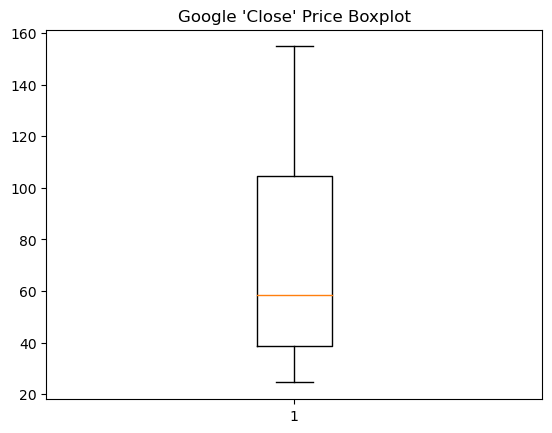

Number of outliers detected in Microsoft data: 0


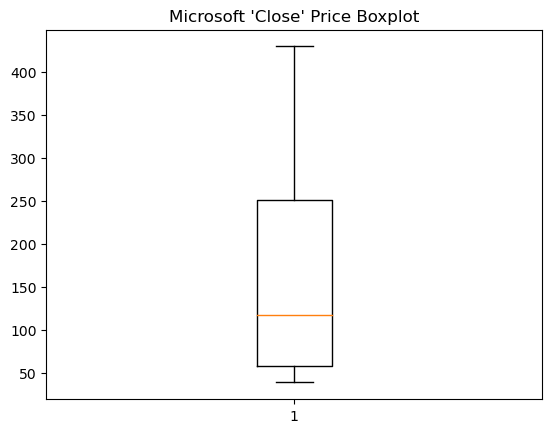

In [8]:
# Identify outliers in 'Close' price using the IQR method for Google data
q25, q75 = google_data['Close'].quantile(0.25), google_data['Close'].quantile(0.75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower_bound, upper_bound = q25 - cutoff, q75 + cutoff

outliers = google_data[(google_data['Close'] < lower_bound) | (google_data['Close'] > upper_bound)]
print("Number of outliers detected in Google data:", outliers.shape[0])

# Consider visualizing outliers with a boxplot
import matplotlib.pyplot as plt
plt.boxplot(google_data['Close'])
plt.title("Google 'Close' Price Boxplot")
plt.show()

# Identify outliers in 'Close' price using the IQR method for Microsoft data
q25, q75 = microsoft_data['Close'].quantile(0.25), microsoft_data['Close'].quantile(0.75)
iqr = q75 - q25
cutoff = iqr * 1.5
lower_bound, upper_bound = q25 - cutoff, q75 + cutoff

outliers = microsoft_data[(microsoft_data['Close'] < lower_bound) | (microsoft_data['Close'] > upper_bound)]
print("Number of outliers detected in Microsoft data:", outliers.shape[0])

# Visualize outliers with a boxplot
plt.boxplot(microsoft_data['Close'])
plt.title("Microsoft 'Close' Price Boxplot")
plt.show()


## 2. Exploratory Data Analysis

In [9]:
print(microsoft_data.shape)
print(microsoft_data.info())

(2519, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2519 non-null   object 
 1   Open       2519 non-null   float64
 2   High       2519 non-null   float64
 3   Low        2519 non-null   float64
 4   Close      2519 non-null   float64
 5   Adj Close  2519 non-null   float64
 6   Volume     2519 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.9+ KB
None


In [10]:
print(google_data.shape)
print(google_data.info())

(2519, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2519 non-null   object 
 1   Open       2519 non-null   float64
 2   High       2519 non-null   float64
 3   Low        2519 non-null   float64
 4   Close      2519 non-null   float64
 5   Adj Close  2519 non-null   float64
 6   Volume     2519 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.9+ KB
None


In [11]:
# Convert 'Date' column to datetime for Google data
google_data['Date'] = pd.to_datetime(google_data['Date'])

# Convert 'Date' column to datetime for Microsoft data
microsoft_data['Date'] = pd.to_datetime(microsoft_data['Date'])

# Display the first few rows to confirm
print("Google Data with 'Date' as datetime:")
print(google_data.head())

print("\nMicrosoft Data with 'Date' as datetime:")
print(microsoft_data.head())


Google Data with 'Date' as datetime:
        Date       Open       High        Low      Close  Adj Close   Volume
0 2014-03-27  28.322241  28.322241  27.570307  27.846546  27.846546   262719
1 2014-03-28  27.983171  28.243956  27.857019  27.922838  27.922838   824257
2 2014-03-31  28.266893  28.272379  27.770258  27.772251  27.772251   216593
3 2014-04-01  27.859013  28.344681  27.859013  28.280355  28.280355   158434
4 2014-04-02  29.917362  30.158699  28.032537  28.272379  28.272379  2942055

Microsoft Data with 'Date' as datetime:
        Date       Open       High        Low      Close  Adj Close    Volume
0 2014-03-27  39.740002  39.970001  39.340000  39.360001  33.330242  35369200
1 2014-03-28  39.790001  40.639999  39.680000  40.299999  34.126236  43472700
2 2014-03-31  40.430000  41.500000  40.400002  40.990002  34.710529  46886300
3 2014-04-01  41.150002  41.590000  41.070000  41.419998  35.074654  32605000
4 2014-04-02  41.439999  41.660000  41.169998  41.349998  35.015373  2

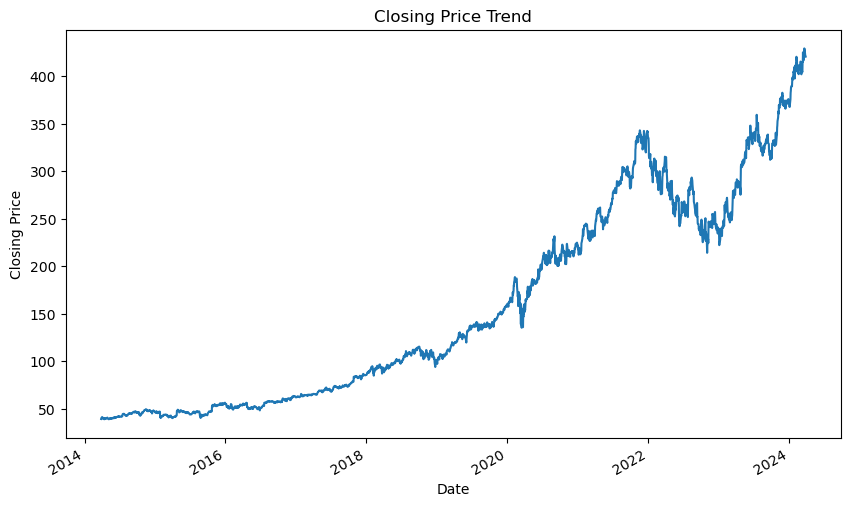

In [12]:
# Set 'Date' as the index
microsoft_data.set_index('Date', inplace=True)

# Extracting year, month, and day from the index
microsoft_data['Year'] = microsoft_data.index.year
microsoft_data['Month'] = microsoft_data.index.month
microsoft_data['Day'] = microsoft_data.index.day

# Visualize the closing price trend
microsoft_data['Close'].plot(figsize=(10, 6))
plt.title('Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

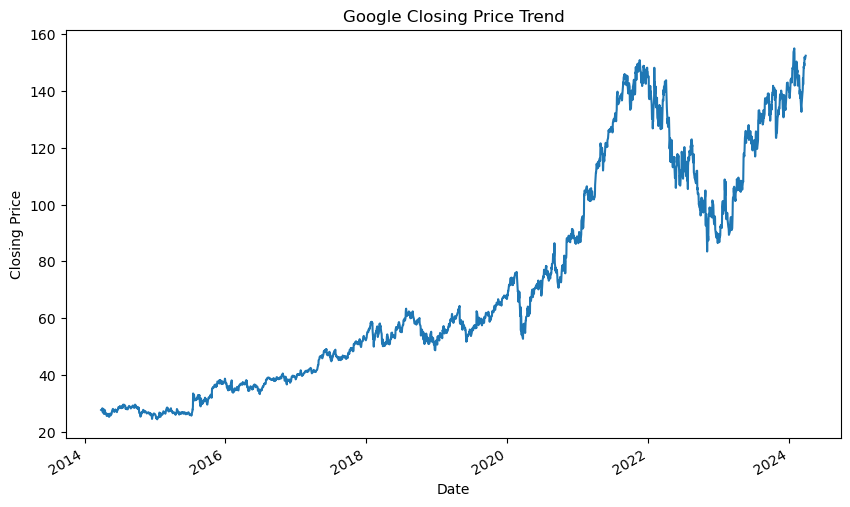

In [13]:
# Set 'Date' as the index
google_data.set_index('Date', inplace=True)

# Extracting year, month, and day from the index
google_data['Year'] = google_data.index.year
google_data['Month'] = google_data.index.month
google_data['Day'] = google_data.index.day

# Visualize the closing price trend
google_data['Close'].plot(figsize=(10, 6))
plt.title('Google Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


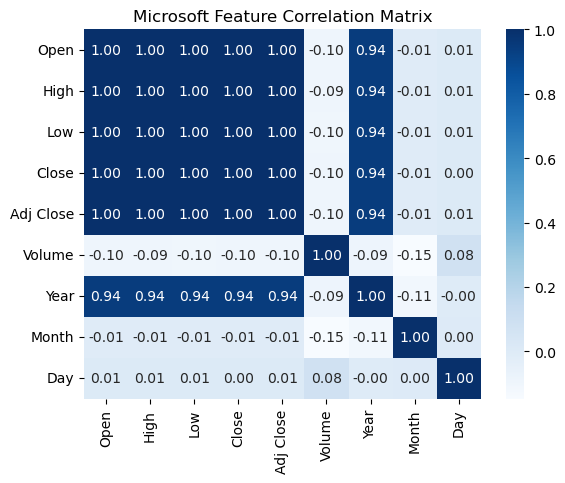

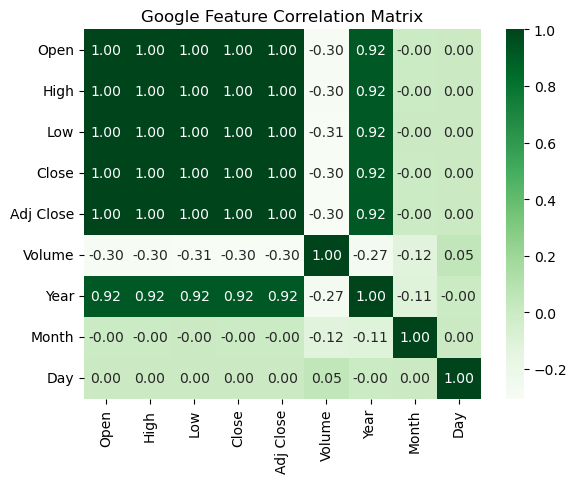

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for Microsoft data
msft_correlation_matrix = microsoft_data.corr()

# Plot heatmap for Microsoft data with blue color scheme
sns.heatmap(msft_correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Microsoft Feature Correlation Matrix')
plt.show()

# Compute correlation matrix for Google data
google_correlation_matrix = google_data.corr()

# Plot heatmap for Google data with green color scheme
sns.heatmap(google_correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Google Feature Correlation Matrix')
plt.show()


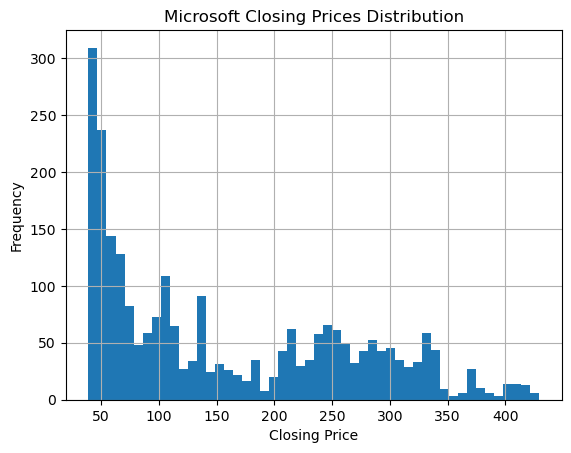

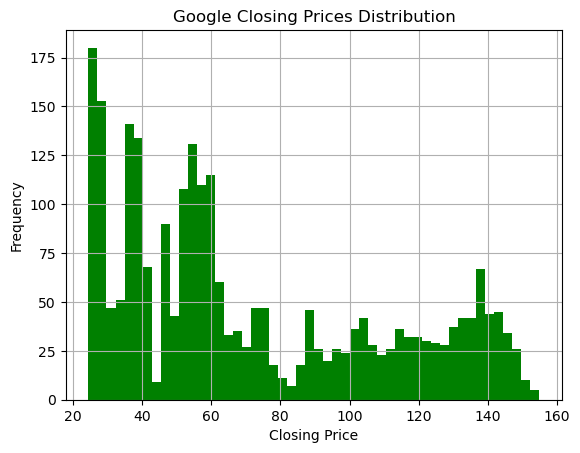

In [15]:
# Plot histogram for Microsoft closing prices
microsoft_data['Close'].hist(bins=50)
plt.title('Microsoft Closing Prices Distribution')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for Google closing prices
google_data['Close'].hist(bins=50, color='green')  # Set color to green for Google
plt.title('Google Closing Prices Distribution')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

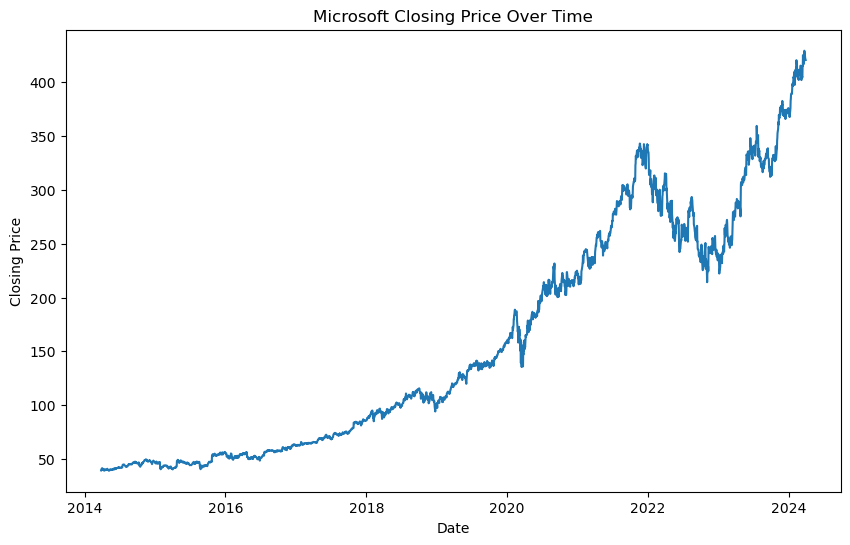

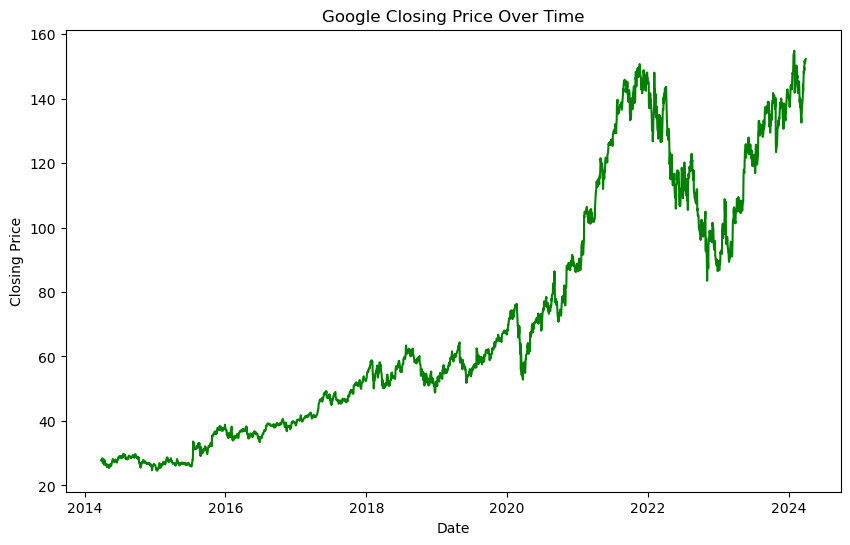

In [16]:
# Microsoft Closing Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=microsoft_data.index, y=microsoft_data['Close'])
plt.title('Microsoft Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Google Closing Prices
plt.figure(figsize=(10, 6))
sns.lineplot(x=google_data.index, y=google_data['Close'], color='green')
plt.title('Google Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


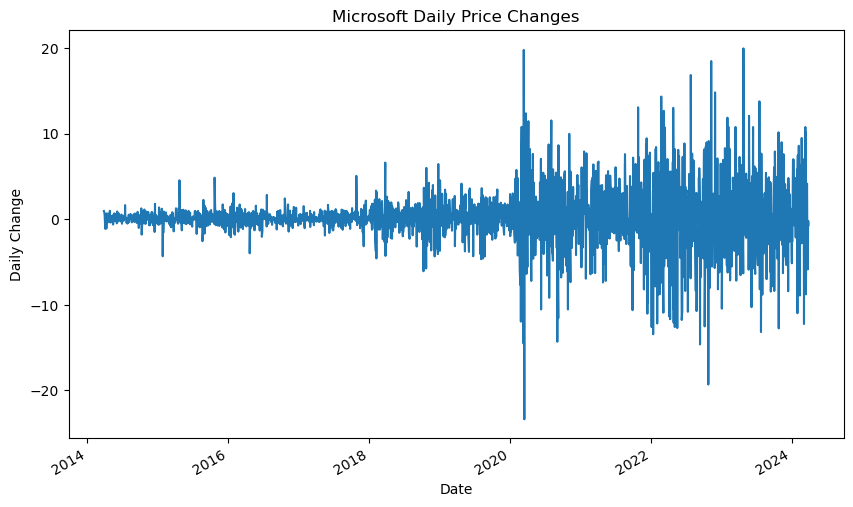

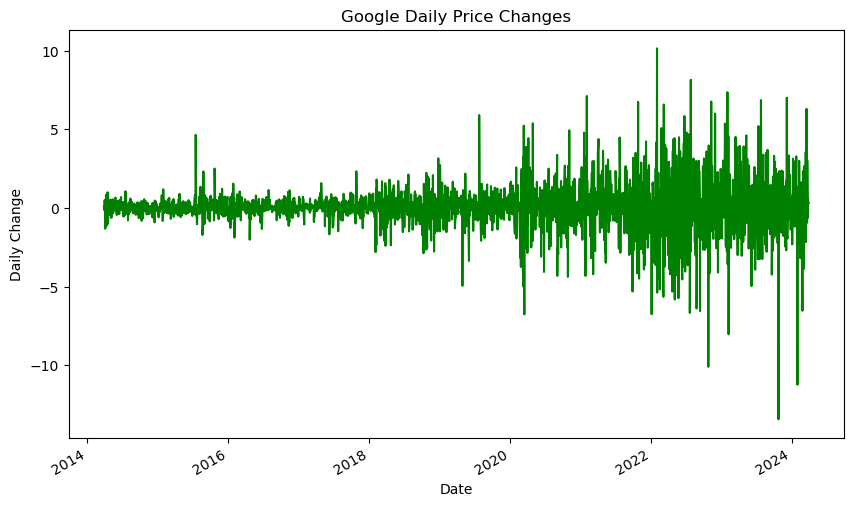

In [17]:
# Plot daily price changes for Microsoft
microsoft_data['Daily Change'] = microsoft_data['Close'].diff()
plt.figure(figsize=(10, 6))
microsoft_data['Daily Change'].plot()
plt.title('Microsoft Daily Price Changes')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.show()

# Plot daily price changes for Google
google_data['Daily Change'] = google_data['Close'].diff()
plt.figure(figsize=(10, 6))
google_data['Daily Change'].plot(color='green')  # Use green for Google
plt.title('Google Daily Price Changes')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.show()


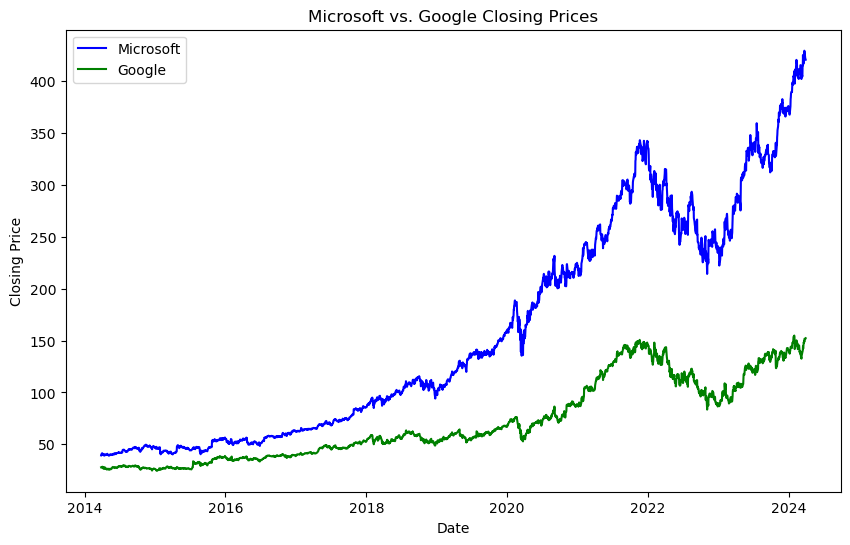

In [18]:
# Plot Microsoft vs. Google closing prices
plt.figure(figsize=(10, 6))
plt.plot(microsoft_data.index, microsoft_data['Close'], label='Microsoft', color='blue')
plt.plot(google_data.index, google_data['Close'], label='Google', color='green')
plt.title('Microsoft vs. Google Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


## 3. Predictive Modelling - LSTM Model 

### Model Building

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the 'Close' column
msft_data_close = microsoft_data['Close'].values.reshape(-1, 1)
msft_scaler = MinMaxScaler(feature_range=(0, 1))
msft_data_scaled = msft_scaler.fit_transform(msft_data_close)

# Function to create dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create the dataset for Microsoft
look_back = 4
msft_X, msft_Y = create_dataset(msft_data_scaled, look_back)

In [20]:
# Split into training and testing sets
train_size = int(len(msft_X) * 0.67)
msft_X_train, msft_X_test = msft_X[:train_size], msft_X[train_size:]
msft_Y_train, msft_Y_test = msft_Y[:train_size], msft_Y[train_size:]

In [21]:
# Reshape the data for LSTM (samples, timesteps, features)
msft_X_train = np.reshape(msft_X_train, (msft_X_train.shape[0], 1, msft_X_train.shape[1]))
msft_X_test = np.reshape(msft_X_test, (msft_X_test.shape[0], 1, msft_X_test.shape[1]))


In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(msft_X_train, msft_Y_train, epochs=20, batch_size=1, verbose=2, validation_data=(msft_X_test, msft_Y_test))

Epoch 1/20


/Users/yahyaamohammed/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1684/1684 - 1s - 678us/step - loss: 7.2563e-04 - val_loss: 6.5784e-04
Epoch 2/20
1684/1684 - 1s - 400us/step - loss: 4.4938e-05 - val_loss: 5.3646e-04
Epoch 3/20
1684/1684 - 1s - 402us/step - loss: 4.8008e-05 - val_loss: 0.0012
Epoch 4/20
1684/1684 - 1s - 402us/step - loss: 4.7750e-05 - val_loss: 0.0015
Epoch 5/20
1684/1684 - 1s - 400us/step - loss: 4.7541e-05 - val_loss: 0.0026
Epoch 6/20
1684/1684 - 1s - 401us/step - loss: 4.6764e-05 - val_loss: 0.0013
Epoch 7/20
1684/1684 - 1s - 399us/step - loss: 4.3742e-05 - val_loss: 0.0011
Epoch 8/20
1684/1684 - 1s - 400us/step - loss: 4.5783e-05 - val_loss: 0.0010
Epoch 9/20
1684/1684 - 1s - 399us/step - loss: 4.8422e-05 - val_loss: 0.0020
Epoch 10/20
1684/1684 - 1s - 411us/step - loss: 4.4139e-05 - val_loss: 0.0012
Epoch 11/20
1684/1684 - 1s - 400us/step - loss: 4.6628e-05 - val_loss: 0.0012
Epoch 12/20
1684/1684 - 1s - 401us/step - loss: 4.1222e-05 - val_loss: 0.0012
Epoch 13/20
1684/1684 - 1s - 402us/step - loss: 4.1838e-05 - val_loss: 0.002

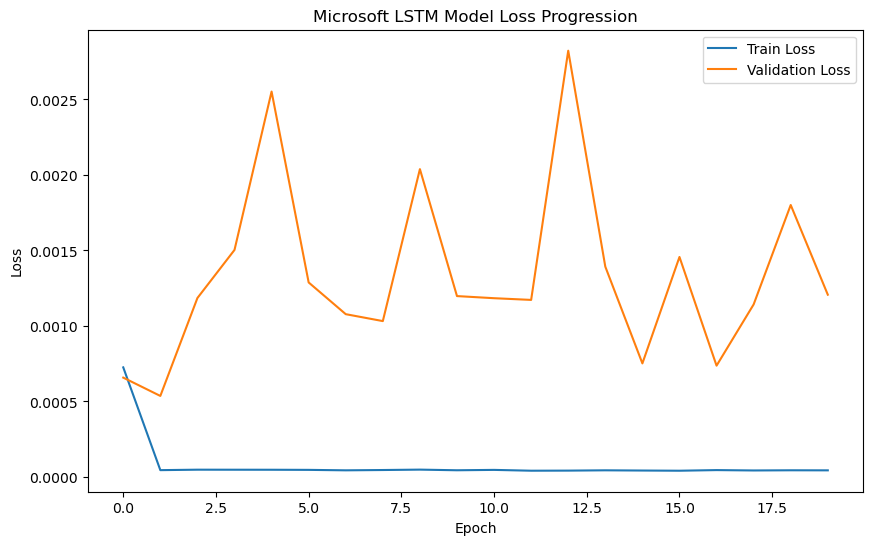

In [23]:
# Plotting loss and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Microsoft LSTM Model Loss Progression')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

### Model Evaluation

In [24]:
from sklearn.metrics import mean_squared_error
import math

# Making predictions
train_predict = model.predict(msft_X_train)
test_predict = model.predict(msft_X_test)

# Inverting predictions
train_predict = msft_scaler.inverse_transform(train_predict)
msft_Y_train_inverse = msft_scaler.inverse_transform([msft_Y_train])
test_predict = msft_scaler.inverse_transform(test_predict)
msft_Y_test_inverse = msft_scaler.inverse_transform([msft_Y_test])

# Calculate and print MSE and RMSE for training data
train_mse = mean_squared_error(msft_Y_train_inverse[0], train_predict[:, 0])
print(f'Microsoft Train MSE: {train_mse:.2f}')
train_rmse = math.sqrt(train_mse)
print(f'Microsoft Train RMSE: {train_rmse:.2f}')

# Calculate and print MSE and RMSE for testing data
test_mse = mean_squared_error(msft_Y_test_inverse[0], test_predict[:, 0])
print(f'Microsoft Test MSE: {test_mse:.2f}')
test_rmse = math.sqrt(test_mse)
print(f'Microsoft Test RMSE: {test_rmse:.2f}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step
Microsoft Train MSE: 4.83
Microsoft Train RMSE: 2.20
Microsoft Test MSE: 183.88
Microsoft Test RMSE: 13.56


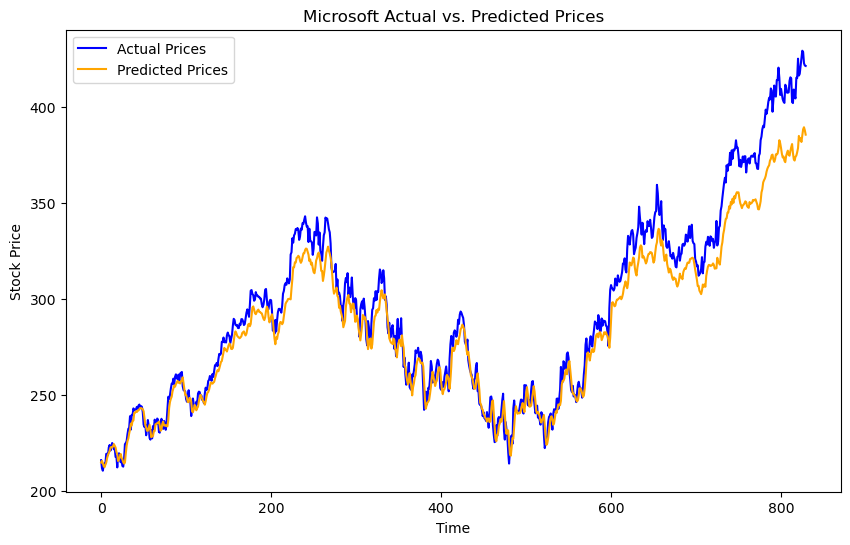

In [25]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(msft_Y_test_inverse[0], label='Actual Prices', color='blue')
plt.plot(test_predict[:, 0], label='Predicted Prices', color='orange')
plt.title('Microsoft Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

# Assuming X_train, Y_train, X_test, and Y_test are already prepared
input_shape = (msft_X_train.shape[1], msft_X_train.shape[2])  # Input shape for LSTM
n_units = 50  # Number of LSTM units

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=n_units, input_shape=input_shape, return_sequences=True))
model.add(Dropout(0.2))  # Dropout with a probability of 20%
model.add(LSTM(units=n_units))
model.add(Dropout(0.2))  # Dropout with a probability of 20%
model.add(Dense(1))  # Output layer for predicting stock price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model
history = model.fit(msft_X_train, msft_Y_train, epochs=20, batch_size=32, 
                    validation_data=(msft_X_test, msft_Y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
train_loss = model.evaluate(msft_X_train, msft_Y_train, verbose=0)
test_loss = model.evaluate(msft_X_test, msft_Y_test, verbose=0)

print(f'Microsoft Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch 1/20


/Users/yahyaamohammed/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0223 - val_loss: 0.0525
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0150
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8738e-04 - val_loss: 0.0044
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2911e-04 - val_loss: 0.0035
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5643e-04 - val_loss: 0.0024
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7289e-04 - val_loss: 8.4246e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.0633e-04 - val_loss: 5.3826e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7632e-04 - val_loss: 3.1671e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5138e-04 - val_loss: 2.5404e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5374e-04 - val_loss: 5.8307e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8203e-04 - val_loss: 6.0630e-04
Epoch 12/20
53/53 ━━━━━━━

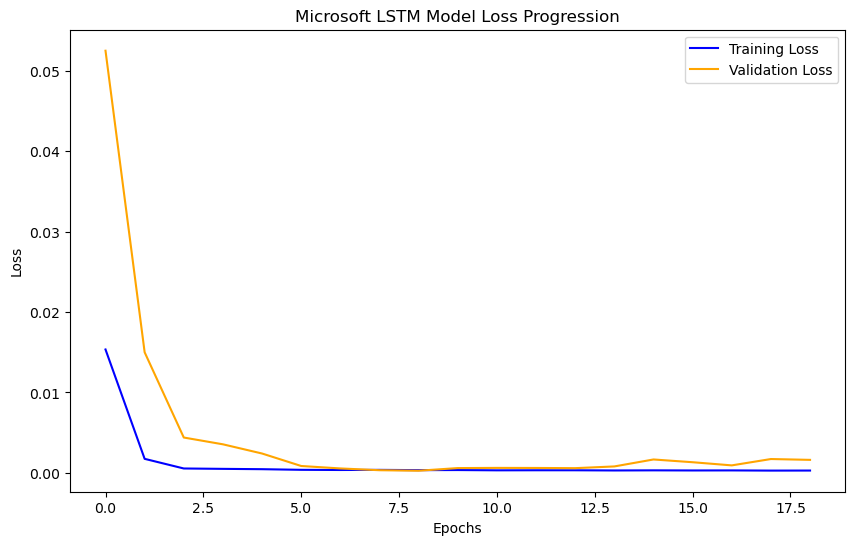

In [27]:
import matplotlib.pyplot as plt

# Plotting loss and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Microsoft LSTM Model Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
import math

# Making predictions
train_predict = model.predict(msft_X_train)
test_predict = model.predict(msft_X_test)

# Inverting predictions
train_predict = msft_scaler.inverse_transform(train_predict)
msft_Y_train_inverse = msft_scaler.inverse_transform([msft_Y_train])
test_predict = msft_scaler.inverse_transform(test_predict)
msft_Y_test_inverse = msft_scaler.inverse_transform([msft_Y_test])

# Calculate and print MSE and RMSE for training data
train_mse = mean_squared_error(msft_Y_train_inverse[0], train_predict[:, 0])
train_rmse = math.sqrt(train_mse)
print(f'Microsoft Train MSE: {train_mse:.2f}')
print(f'Microsoft Train RMSE: {train_rmse:.2f}')

# Calculate and print MSE and RMSE for testing data
test_mse = mean_squared_error(msft_Y_test_inverse[0], test_predict[:, 0])
test_rmse = math.sqrt(test_mse)
print(f'Microsoft Test MSE: {test_mse:.2f}')
print(f'Microsoft Test RMSE: {test_rmse:.2f}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step
Microsoft Train MSE: 9.54
Microsoft Train RMSE: 3.09
Microsoft Test MSE: 244.56
Microsoft Test RMSE: 15.64


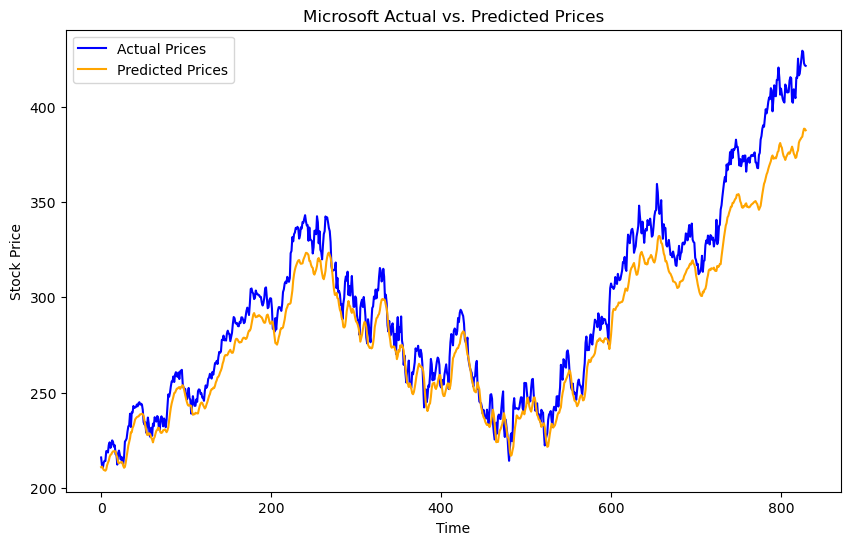

In [29]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(msft_Y_test_inverse[0], label='Actual Prices', color='blue')
plt.plot(test_predict[:, 0], label='Predicted Prices', color='orange')
plt.title('Microsoft Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()

### Fine-Tuning

In [30]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the 'Close' column
msft_data_close = microsoft_data['Close'].values.reshape(-1, 1)
msft_scaler = MinMaxScaler(feature_range=(0, 1))
msft_data_scaled = msft_scaler.fit_transform(msft_data_close)

# Create a dataset where X is the stock price at time (t) and Y is the price at time (t + 1)
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Set look-back period
look_back = 4
msft_X, msft_Y = create_dataset(msft_data_scaled, look_back)

In [31]:
# Split into training and testing sets
train_size = int(len(msft_X) * 0.67)
msft_X_train, msft_X_test = msft_X[:train_size], msft_X[train_size:]
msft_Y_train, msft_Y_test = msft_Y[:train_size], msft_Y[train_size:]


In [32]:
# Reshape the data for LSTM (samples, timesteps, features)
msft_X_train = np.reshape(msft_X_train, (msft_X_train.shape[0], 1, msft_X_train.shape[1]))
msft_X_test = np.reshape(msft_X_test, (msft_X_test.shape[0], 1, msft_X_test.shape[1]))


In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping

# Define model parameters
input_shape = (msft_X_train.shape[1], msft_X_train.shape[2])
n_units = 50  # Number of LSTM units

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=n_units, return_sequences=True), input_shape=input_shape))
model.add(Dropout(0.2))  # Dropout with a probability of 20%
model.add(LSTM(units=n_units))
model.add(Dropout(0.2))  # Dropout with a probability of 20%
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(msft_X_train, msft_Y_train, epochs=20, batch_size=32, 
                    validation_data=(msft_X_test, msft_Y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
train_loss = model.evaluate(msft_X_train, msft_Y_train, verbose=0)
test_loss = model.evaluate(msft_X_test, msft_Y_test, verbose=0)

print(f'Microsoft Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch 1/20


/Users/yahyaamohammed/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0214 - val_loss: 0.0187
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0105
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6823e-04 - val_loss: 0.0040
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5075e-04 - val_loss: 0.0024
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6951e-04 - val_loss: 0.0022
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.5208e-04 - val_loss: 3.1962e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6880e-04 - val_loss: 3.5026e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0336e-04 - val_loss: 4.0319e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4301e-04 - val_loss: 3.4083e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6376e-04 - val_loss: 6.9826e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5106e-04 - val_loss: 0.0016
Epoch 12/20
53/53 ━━━━━━━━━━━

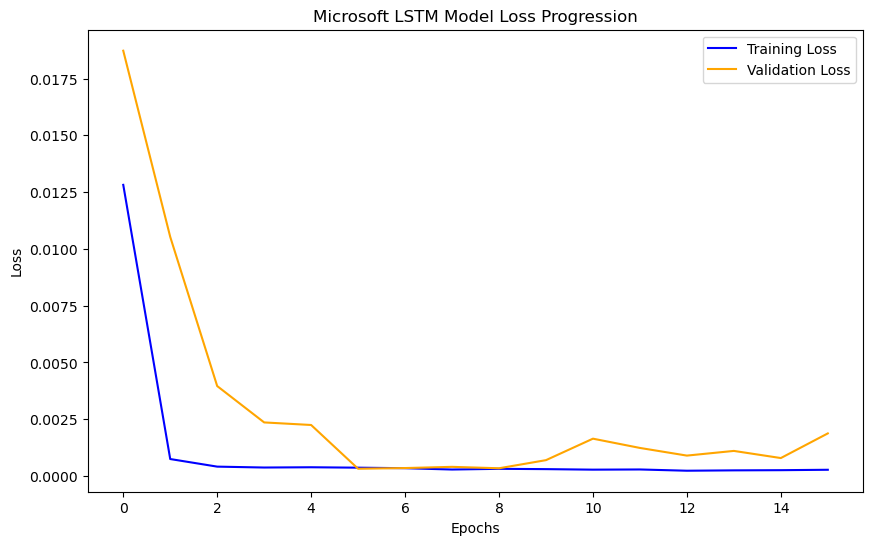

In [34]:
import matplotlib.pyplot as plt

# Plotting loss and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Microsoft LSTM Model Loss Progression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Making predictions
train_predict = model.predict(msft_X_train)
test_predict = model.predict(msft_X_test)

# Inverting predictions
train_predict = msft_scaler.inverse_transform(train_predict)
msft_Y_train_inverse = msft_scaler.inverse_transform([msft_Y_train])
test_predict = msft_scaler.inverse_transform(test_predict)
msft_Y_test_inverse = msft_scaler.inverse_transform([msft_Y_test])

# Calculate MSE, RMSE, and MAE for training data
train_mse = mean_squared_error(msft_Y_train_inverse[0], train_predict[:, 0])
train_rmse = math.sqrt(train_mse)
train_mae = mean_absolute_error(msft_Y_train_inverse[0], train_predict[:, 0])

print(f'Microsoft Train MSE: {train_mse:.2f}')
print(f'Microsoft Train RMSE: {train_rmse:.2f}')
print(f'Microsoft Train MAE: {train_mae:.2f}')

# Calculate MSE, RMSE, and MAE for testing data
test_mse = mean_squared_error(msft_Y_test_inverse[0], test_predict[:, 0])
test_rmse = math.sqrt(test_mse)
test_mae = mean_absolute_error(msft_Y_test_inverse[0], test_predict[:, 0])

print(f'Microsoft Test MSE: {test_mse:.2f}')
print(f'Microsoft Test RMSE: {test_rmse:.2f}')
print(f'Microsoft Test MAE: {test_mae:.2f}')


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step
Microsoft Train MSE: 10.79
Microsoft Train RMSE: 3.28
Microsoft Train MAE: 2.19
Microsoft Test MSE: 285.75
Microsoft Test RMSE: 16.90
Microsoft Test MAE: 14.32


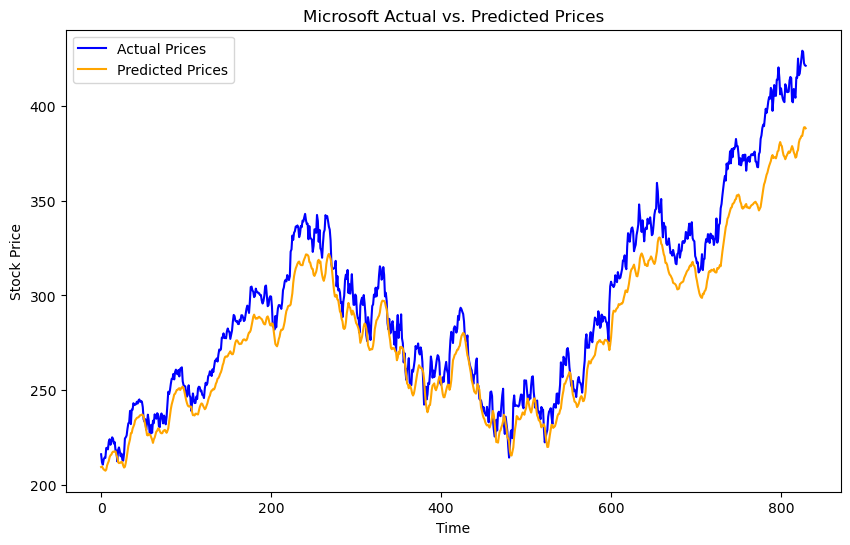

In [36]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(msft_Y_test_inverse[0], label='Actual Prices', color='blue')
plt.plot(test_predict[:, 0], label='Predicted Prices', color='orange')
plt.title('Microsoft Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()


### Test on Google Dataset

In [37]:
# Prepare the 'Close' data for Google
data_google = google_data['Close'].values.reshape(-1, 1)
data_scaled_google = msft_scaler.transform(data_google)  # Use Microsoft scaler for consistency

# Define look-back period and create datasets for Google
look_back = 4
X_google, Y_google = create_dataset(data_scaled_google, look_back)


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Reshape Google data for LSTM model
X_google = np.reshape(X_google, (X_google.shape[0], 1, X_google.shape[1]))

# Making predictions for Google dataset
predict_google = model.predict(X_google)

# Inverting predictions
predict_google = msft_scaler.inverse_transform(predict_google)
Y_google_inverse = msft_scaler.inverse_transform([Y_google])

# Calculate and print MSE, RMSE, and MAE
mse_google = mean_squared_error(Y_google_inverse[0], predict_google[:, 0])
print(f'Google MSE: {mse_google:.2f}')
rmse_google = math.sqrt(mse_google)
print(f'Google RMSE: {rmse_google:.2f}')
mae_google = mean_absolute_error(Y_google_inverse[0], predict_google[:, 0])
print(f'Google MAE: {mae_google:.2f}')


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step
Google MSE: 5.78
Google RMSE: 2.40
Google MAE: 1.67


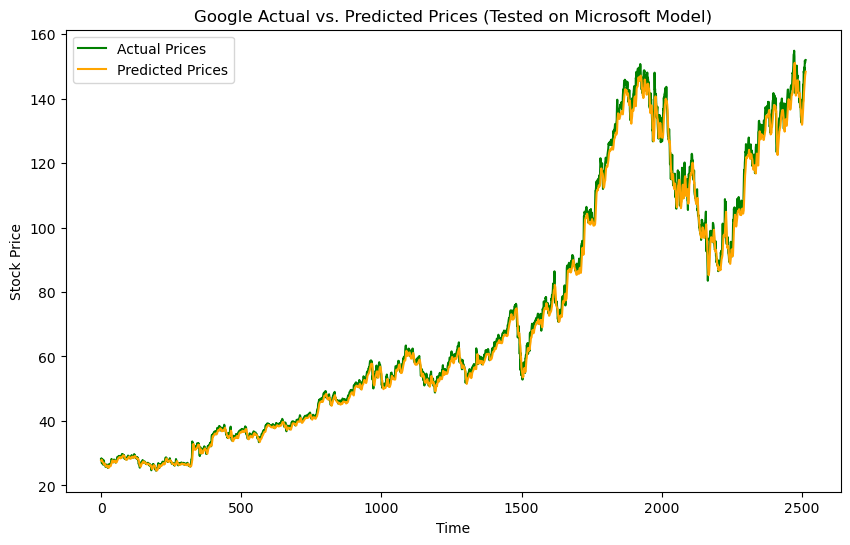

In [39]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices for Google
plt.figure(figsize=(10, 6))
plt.plot(Y_google_inverse[0], label='Actual Prices', color='green')
plt.plot(predict_google[:, 0], label='Predicted Prices', color='orange')
plt.title('Google Actual vs. Predicted Prices (Tested on Microsoft Model)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()


Epoch 1/20


/Users/yahyaamohammed/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0110 - val_loss: 5.5937e-04
Epoch 2/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 7.6778e-04 - val_loss: 0.0011
Epoch 3/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 5.6303e-04 - val_loss: 0.0018
Epoch 4/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 5.8075e-04 - val_loss: 0.0011
Epoch 5/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - loss: 4.7230e-04 - val_loss: 6.1409e-04
Epoch 6/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 5.7248e-04 - val_loss: 9.4805e-04
Epoch 7/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 5.2199e-04 - val_loss: 9.6698e-04
Epoch 8/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 3.7206e-04 - val_loss: 9.0415e-04
Epoch 9/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 4.2685e-04 - val_loss: 9.5377e-04
Epoch 10/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 5.1106e-04 - val_loss: 9.3536e-04
Epoch 11/20
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 4.2212e-04 - val_loss: 0.00

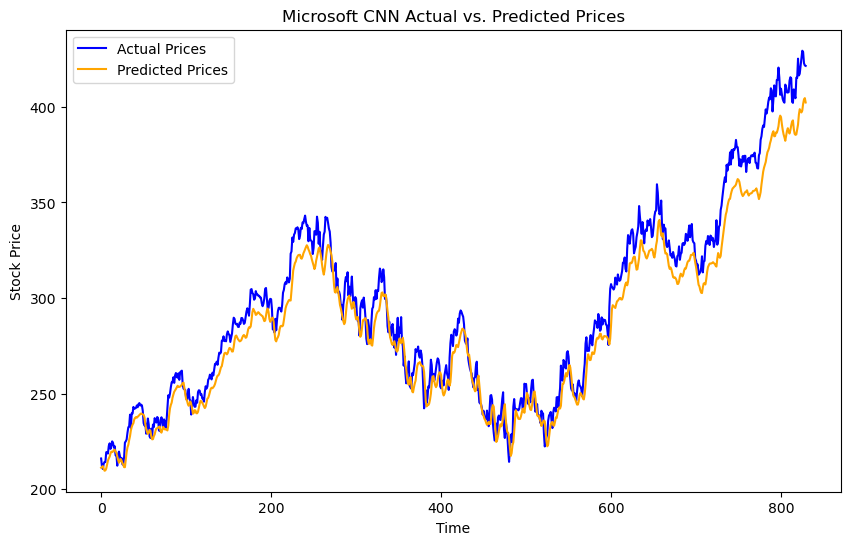

In [40]:
# Import necessary libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import matplotlib.pyplot as plt

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Load and scale data
msft_data_close = microsoft_data['Close'].values.reshape(-1, 1)
msft_scaler = MinMaxScaler(feature_range=(0, 1))
msft_data_scaled = msft_scaler.fit_transform(msft_data_close)

# Adjust the sliding window look_back period
look_back = 4  # Increase look_back to ensure enough time steps
msft_X, msft_Y = create_dataset(msft_data_scaled, look_back)

# Split into training and testing sets
train_size = int(len(msft_X) * 0.67)
msft_X_train, msft_X_test = msft_X[:train_size], msft_X[train_size:]
msft_Y_train, msft_Y_test = msft_Y[:train_size], msft_Y[train_size:]

# Reshape data for CNN (samples, time steps, features)
msft_X_train = np.reshape(msft_X_train, (msft_X_train.shape[0], msft_X_train.shape[1], 1))
msft_X_test = np.reshape(msft_X_test, (msft_X_test.shape[0], msft_X_test.shape[1], 1))

# Define CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    
    # Add Conv1D layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    
    # Add MaxPooling layer
    model.add(MaxPooling1D(pool_size=2))
    
    # Flatten the output
    model.add(Flatten())
    
    # Add Dense layer for prediction
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))  # Dropout to prevent overfitting
    model.add(Dense(1))  # Output layer for Close price prediction
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the CNN model
cnn_input_shape = (msft_X_train.shape[1], msft_X_train.shape[2])
cnn_model = create_cnn_model(cnn_input_shape)

cnn_history = cnn_model.fit(
    msft_X_train, msft_Y_train,
    epochs=20, batch_size=32, validation_data=(msft_X_test, msft_Y_test), verbose=1
)

# Evaluate the CNN model
cnn_train_loss = cnn_model.evaluate(msft_X_train, msft_Y_train, verbose=0)
cnn_test_loss = cnn_model.evaluate(msft_X_test, msft_Y_test, verbose=0)

print(f"Microsoft CNN Train Loss: {cnn_train_loss:.4f}, Test Loss: {cnn_test_loss:.4f}")

# Make predictions
train_predict = cnn_model.predict(msft_X_train)
test_predict = cnn_model.predict(msft_X_test)

# Invert predictions
train_predict = msft_scaler.inverse_transform(train_predict)
msft_Y_train_inverse = msft_scaler.inverse_transform([msft_Y_train])
test_predict = msft_scaler.inverse_transform(test_predict)
msft_Y_test_inverse = msft_scaler.inverse_transform([msft_Y_test])

# Calculate MSE, RMSE, and MAE
train_mse = mean_squared_error(msft_Y_train_inverse[0], train_predict[:, 0])
train_rmse = math.sqrt(train_mse)
train_mae = mean_absolute_error(msft_Y_train_inverse[0], train_predict[:, 0])

test_mse = mean_squared_error(msft_Y_test_inverse[0], test_predict[:, 0])
test_rmse = math.sqrt(test_mse)
test_mae = mean_absolute_error(msft_Y_test_inverse[0], test_predict[:, 0])

print(f"Train MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}")

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(msft_Y_test_inverse[0], label='Actual Prices', color='blue')
plt.plot(test_predict[:, 0], label='Predicted Prices', color='orange')
plt.title('Microsoft CNN Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step
Google Test MSE: 21.66, RMSE: 4.65, MAE: 3.15


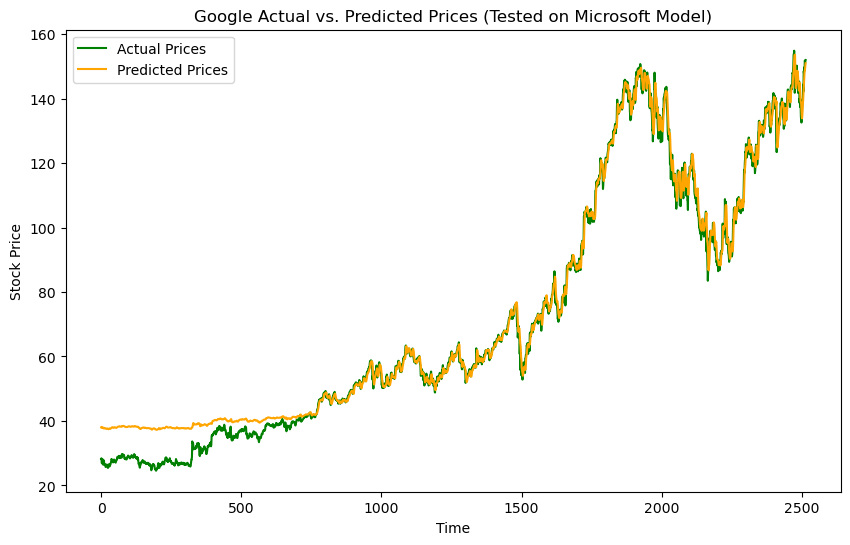

In [41]:
# Scale the 'Close' column for Google using the Microsoft scaler for consistency
google_data_close = google_data['Close'].values.reshape(-1, 1)
google_data_scaled = msft_scaler.transform(google_data_close)

# Create the dataset for Google with the same look_back as Microsoft
look_back = 4  # Ensure this matches the look_back used for the CNN model
X_google, Y_google = create_dataset(google_data_scaled, look_back)

# Reshape the data for CNN (samples, time steps, features)
X_google = np.reshape(X_google, (X_google.shape[0], X_google.shape[1], 1))

# Make predictions for Google data
predict_google = cnn_model.predict(X_google)

# Invert predictions and actual values
predict_google = msft_scaler.inverse_transform(predict_google)
Y_google_inverse = msft_scaler.inverse_transform([Y_google])

# Calculate metrics
google_mse = mean_squared_error(Y_google_inverse[0], predict_google[:, 0])
google_rmse = math.sqrt(google_mse)
google_mae = mean_absolute_error(Y_google_inverse[0], predict_google[:, 0])

print(f"Google Test MSE: {google_mse:.2f}, RMSE: {google_rmse:.2f}, MAE: {google_mae:.2f}")

# Plot actual vs. predicted prices for Google
plt.figure(figsize=(10, 6))
plt.plot(Y_google_inverse[0], label='Actual Prices', color='green')
plt.plot(predict_google[:, 0], label='Predicted Prices', color='orange')
plt.title('Google Actual vs. Predicted Prices (Tested on Microsoft Model)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')
plt.show()
